# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#Test both list to see the information is opened

#lat_lngs
#cities

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
#finding in the 

#locating the information within the API required of each city 

#City / weather_json['name']
#Cloudiness / weather_json['clouds']['all']
# Country / weather_json['sys']['country']   
# Date   / weather_json['dt']
# Humidity   / weather_json['main']['humidity']
# Lat   / weather_json['coord']['lat']
# Lng  /  weather_json['coord']['lon']  
# Max Temp    / weather_json['main']['temp_max']    
# Wind Speed  /  weather_json['wind']['speed']

In [18]:
#Create list to hold the information

city_name = []
cloudines = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []
not_located = []
loop = 1

units='imperial'
base_url= 'http://api.openweathermap.org/data/2.5/weather?'



In [19]:
#
print('Beginning Data Retrieval')
print('-----------------------------')

#creating the loop to generate the various requests

for x in cities:
    
    query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
    weather_response = requests.get(query_url + x)
    weather_json=weather_response.json()

#requesting the information from the API from each city.

    try:
        city_name.append(weather_json['name'])
        cloudines.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        print(f'processing record {loop} | {x}')

# use exception to jump the missing cities and keep the code alive.

    except KeyError:
        not_located.append(x)
        print(f'City ({x}) city not found. Skipping...')
        loop=loop-1
    loop+=1
  
print('-----------------------------') 
print('Data Retrieval Complete')
print('-----------------------------')       

Beginning Data Retrieval
-----------------------------
processing record 1 | port alfred
processing record 2 | punta arenas
processing record 3 | choya
processing record 4 | arraial do cabo
processing record 5 | berlevag
processing record 6 | rundu
processing record 7 | kapaa
processing record 8 | katsuura
processing record 9 | parabel
processing record 10 | saint-philippe
processing record 11 | magadan
processing record 12 | sayyan
processing record 13 | vaini
processing record 14 | atuona
processing record 15 | cabra
processing record 16 | praia da vitoria
processing record 17 | butaritari
processing record 18 | ushuaia
processing record 19 | busselton
processing record 20 | hobart
processing record 21 | khatanga
processing record 22 | kruisfontein
processing record 23 | faanui
processing record 24 | airai
City (aybak) city not found. Skipping...
City (vaitupu) city not found. Skipping...
processing record 25 | avarua
processing record 26 | albany
processing record 27 | comodoro riva

processing record 220 | aykhal
processing record 221 | nioro
processing record 222 | tasiilaq
processing record 223 | livingston
processing record 224 | poya
processing record 225 | sangar
processing record 226 | nuevo progreso
processing record 227 | paka
processing record 228 | winnemucca
processing record 229 | lata
processing record 230 | tottori
processing record 231 | esperance
processing record 232 | san quintin
processing record 233 | moerai
processing record 234 | dhidhdhoo
City (reefton) city not found. Skipping...
processing record 235 | coolum beach
processing record 236 | cabo san lucas
processing record 237 | nanning
processing record 238 | muncar
processing record 239 | shetpe
processing record 240 | diplo
processing record 241 | nelson
processing record 242 | alice town
processing record 243 | mbalmayo
processing record 244 | geraldton
processing record 245 | maragogi
processing record 246 | riyadh
City (taolanaro) city not found. Skipping...
processing record 247 | jha

processing record 447 | caravelas
processing record 448 | youkounkoun
City (sentyabrskiy) city not found. Skipping...
processing record 449 | portree
processing record 450 | buraydah
processing record 451 | kijang
processing record 452 | wenling
processing record 453 | andapa
processing record 454 | yanam
processing record 455 | zhigansk
processing record 456 | beringovskiy
processing record 457 | itaituba
processing record 458 | qandala
processing record 459 | vao
processing record 460 | grimshaw
processing record 461 | itoman
processing record 462 | general roca
processing record 463 | miraflores
processing record 464 | wanaka
processing record 465 | dharchula
processing record 466 | patea
processing record 467 | ossora
processing record 468 | progreso
processing record 469 | houma
processing record 470 | jiangyou
processing record 471 | jiazi
processing record 472 | suntar
processing record 473 | half moon bay
processing record 474 | vila franca do campo
processing record 475 | san 

In [10]:
#Create list to


In [20]:
print(f'{len(not_located)}/{len(cities)} cities were not found')

not_located=set(not_located)
cities=set(cities)
updated_cities = list(cities-not_located)



50/647 cities were not found


In [23]:
#format the column of dates of the df
dates=[]
for city in date:
    date_test=city
    date_conversion=time.gmtime(date_test)
    date_format=time.strftime('%m/%d/%Y',date_conversion)
    dates.append(date_format)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#create data frame with the information requested from API
weather_df=pd.DataFrame({"City": city_name,
                        'Cloudiness': cloudines,
                        'Country': country,
                        'Date': date,
                        'Humidity (%)': humidity,
                        'Latitude': lat,
                        'Longitude': lon,
                        'Max Temperature': max_temp,
                        'Wind Speed (MPH)': wind_speed})
#weather_df.dtypes

#display the data frame weather created 
weather_df


,City,Cloudiness,Country,Date,Humidity (%),Latitude,Longitude,Max Temperature,Wind Speed (MPH)
0,Port Alfred,92,ZA,1584221806,86,-33.59,26.89,68.00,4.00
1,Punta Arenas,75,CL,1584221998,58,-53.15,-70.92,59.00,21.92
2,Choya,100,RU,1584222305,69,52.01,86.55,33.93,6.17
3,Arraial do Cabo,40,BR,1584222037,83,-22.97,-42.03,80.60,11.41
4,Berlevåg,93,NO,1584222086,74,70.86,29.09,22.05,28.68
...,...,...,...,...,...,...,...,...,...
592,Khartoum,94,SD,1584222236,14,15.55,32.53,75.20,13.87
593,‘Āhuimanu,90,US,1584222398,73,21.44,-157.84,82.40,6.93
594,Singkang,20,MY,1584222398,88,2.10,102.80,78.80,4.70
595,Korem,99,ET,1584222399,85,12.51,39.52,60.39,2.13


In [25]:
#Exporting DF Cities as a CSV File 

cities_df=pd.DataFrame({"City": city_name,
                        'Cloudiness': cloudines,
                        'Country': country,
                        'Date': date,
                        'Humidity (%)': humidity,
                        'Latitude': lat,
                        'Longitude': lon,
                        'Max Temperature': max_temp,
                        'Wind Speed (MPH)': wind_speed})

cities_df.to_csv("Output_Data/Cities.csv",index=False)  




In [26]:
cities_df.head(5)


,City,Cloudiness,Country,Date,Humidity (%),Latitude,Longitude,Max Temperature,Wind Speed (MPH)
0,Port Alfred,92,ZA,1584221806,86,-33.59,26.89,68.00,4.00
1,Punta Arenas,75,CL,1584221998,58,-53.15,-70.92,59.00,21.92
2,Choya,100,RU,1584222305,69,52.01,86.55,33.93,6.17
3,Arraial do Cabo,40,BR,1584222037,83,-22.97,-42.03,80.60,11.41
4,Berlevåg,93,NO,1584222086,74,70.86,29.09,22.05,28.68


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

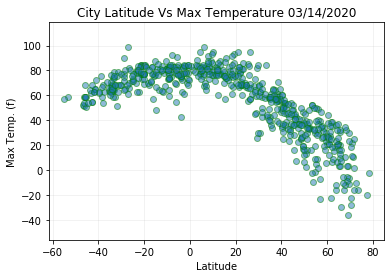

In [27]:
#plotting lat vs temp 

#Creating the variables to use from the dataframe to make the scatter plot

x_axis_latitude = weather_df.loc[:,'Latitude']
y_axis_temp = weather_df.loc[:,'Max Temperature']

#creating the scatter plot
plt.scatter(x_axis_latitude,y_axis_temp, edgecolor='green', alpha=.5)

#formating the graph
plt.title(f'City Latitude Vs Max Temperature {dates[0]}')
plt.ylabel('Max Temp. (f)')
plt.xlabel('Latitude')
plt.grid(alpha=0.2)
plt.ylim(min(y_axis_temp)-20,max(y_axis_temp)+20)

#printing out the final graph

plt.savefig('Output_Data/latitude_MaxTemp.png')

#### Latitude vs. Humidity Plot

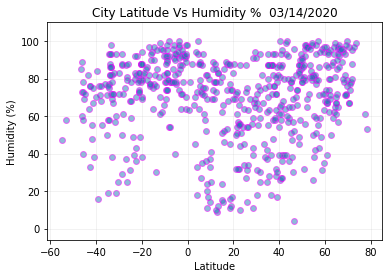

In [28]:
#establishing variables from the df to create the scatter plot
x_axis_latitude = weather_df.loc[:,'Latitude']
y_axis_humidity = weather_df.loc[:,'Humidity (%)']

#creating the scatter plot
plt.scatter(x_axis_latitude,y_axis_humidity , edgecolor='magenta', alpha=.5)

#formating the graph
plt.title(f'City Latitude Vs Humidity %  {dates[0]}')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(alpha=0.2)
plt.ylim(min(y_axis_humidity)-10,max(y_axis_humidity)+10)

#printing out the final graph

plt.savefig('Output_Data/latitude_humidity.png')


#### Latitude vs. Cloudiness Plot

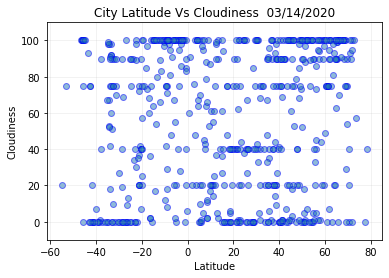

In [29]:
#establishing variables from the df to create the scatter plot
x_axis_latitude = weather_df.loc[:,'Latitude']
y_axis_cloudiness = weather_df.loc[:,'Cloudiness']

#creating the scatter plot
plt.scatter(x_axis_latitude,y_axis_cloudiness , edgecolor='blue', alpha=.5)

#formating the graph
plt.title(f'City Latitude Vs Cloudiness  {dates[0]}')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(alpha=0.2)
plt.ylim(min(y_axis_cloudiness)-10,max(y_axis_cloudiness)+10)

#printing out the final graph

plt.savefig('Output_Data/latitude_cloudiness.png')

#### Latitude vs. Wind Speed Plot

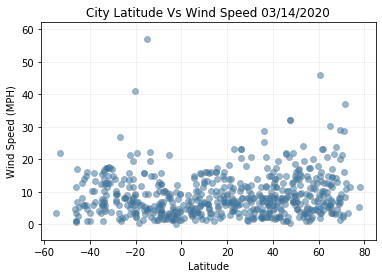

In [30]:
#establishing variables from the df to create the scatter plot
x_axis_latitude = weather_df.loc[:,'Latitude']
y_axis_wind_speed = weather_df.loc[:,'Wind Speed (MPH)']

#creating the scatter plot
plt.scatter(x_axis_latitude,y_axis_wind_speed , edgecolor='gray', alpha=.5)

#formating the graph
plt.title(f'City Latitude Vs Wind Speed {dates[0]}')
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(alpha=0.2)
plt.ylim(min(y_axis_wind_speed)-5,max(y_axis_wind_speed)+5)

#printing out the final graph

plt.savefig('Output_Data/latitude_winspeed.png')

## Linear Regression

In [31]:
# OPTIONAL: Create a function to create Linear Regression plots

# #Create function to plot each graph with line of best fit:
# def plot_graph(x,y):
#     plt.scatter(x,y)
#     plt.xlim(min(x)-3,max(x)+2)
#     plt.ylim(min(y)-4,max(y)+4)
#     #Correlation
#     _slope, _int, _r, _p, _std_err = st.linregress(x,y)
#     best_fit = _slope * x + _int
#     plt.plot(x,best_fit,"r--", linewidth=.5)
#     line_eq = "y = " + str(round(_slope,2)) + "x + " + str(round(_int,2))
#     plt.annotate(line_eq,(min(x)+10,min(y)+20),fontsize=12,color="red")
#     #pearon correlation statement
#     pearson_r=st.pearsonr(x,y)[0]
#     if abs(pearson_r)>0.7:
#         print(f'The r value is {round(pearson_r,2)}, there is strong correlation between the city latitude and weather')
#     elif abs(pearson_r)>0.5:
#         print(f'The r value is {round(pearson_r,2)}, there is a moderate correlation between the city latitude and weather')
#     elif abs(pearson_r)>0.3:
#         print(f'The r value is {round(pearson_r,2)}, there is a weak correlation between the city latitude and weather')
#     else:
#         print(f'The r value is {round(pearson_r,2)}, there is no correlation between the city latitude and weather')

In [32]:
# Create Northern and Southern Hemisphere DataFrames

north_hemisphere_df = weather_df.loc[weather_df['Latitude']>=0]
south_hemisphere_df = weather_df.loc[weather_df['Latitude']<0]

#Testing the data frames created
#north_hemisphere_df
south_hemisphere_df

,City,Cloudiness,Country,Date,Humidity (%),Latitude,Longitude,Max Temperature,Wind Speed (MPH)
0,Port Alfred,92,ZA,1584221806,86,-33.59,26.89,68.00,4.00
1,Punta Arenas,75,CL,1584221998,58,-53.15,-70.92,59.00,21.92
3,Arraial do Cabo,40,BR,1584222037,83,-22.97,-42.03,80.60,11.41
5,Rundu,73,NA,1584222305,86,-17.93,19.77,68.49,5.82
9,Saint-Philippe,20,RE,1584221963,73,-21.36,55.77,77.00,8.05
...,...,...,...,...,...,...,...,...,...
565,Pilar,75,BR,1584222300,78,-9.60,-35.96,80.60,10.29
575,Port Lincoln,99,AU,1584221999,76,-34.73,135.87,60.21,15.39
576,Nelson Bay,75,AU,1584222073,72,-32.72,152.15,68.00,17.22
581,Imbituba,0,BR,1584222397,61,-28.24,-48.67,80.60,9.17


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation factor is -0.88
y = -1.26x + 95.84


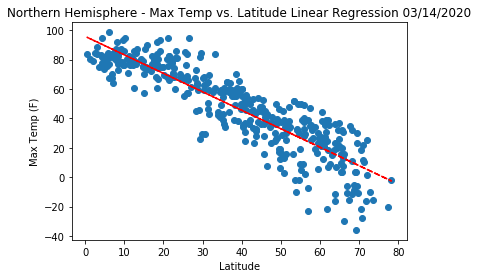

<Figure size 432x288 with 0 Axes>

In [33]:
north_temp = north_hemisphere_df.loc[:,'Max Temperature']
north_latitude = north_hemisphere_df.loc[:,'Latitude']

y = north_temp 
x = north_latitude

#calculating the linear regression using scipy.stats library
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
print(f"The correlation factor is {round(rvalue, 2)}")

# #format
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
regress = x * slope + intercept

line_eq = print(f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.scatter(x, y)
plt.plot(x, regress, "r--")

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("Output_Data/maxtemp_Nlat_LR.png", dpi=50)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation factor is 0.55
y = 0.38x + 80.76


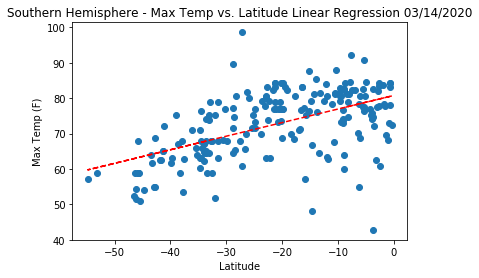

<Figure size 432x288 with 0 Axes>

In [34]:
south_latitude = south_hemisphere_df.loc[:,'Latitude']
south_temp = south_hemisphere_df.loc[:,'Max Temperature']

x = south_latitude
y = south_temp


#calculating the linear regression using scipy.stats library
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
print(f"The correlation factor is {round(rvalue, 2)}")

# #format
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
regress = x * slope + intercept

line_eq = print(f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.scatter(x, y)
plt.plot(x, regress, "r--")

fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig("Output_Data/maxtemp_Slat_LR.png", dpi=50)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation factor is 0.32
y = 0.37x + 52.88


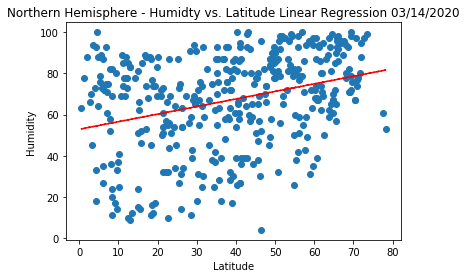

<Figure size 432x288 with 0 Axes>

In [35]:
north_humidity = north_hemisphere_df.loc[:,'Humidity (%)']
north_latitude = north_hemisphere_df.loc[:,'Latitude']

y = north_humidity 
x = north_latitude

#calculating the linear regression using scipy.stats library
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
print(f"The correlation factor is {round(rvalue, 2)}")

# #format
plt.title(f"Northern Hemisphere - Humidty vs. Latitude Linear Regression {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
regress = x * slope + intercept

line_eq = print(f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.scatter(x, y)
plt.plot(x, regress, "r--")


fig3 = plt.gcf()
plt.show()
plt.draw()
fig3.savefig("Output_Data/humidity_Nlat_LR.png", dpi=50)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation factor is 0.39
y = 0.51x + 86.23


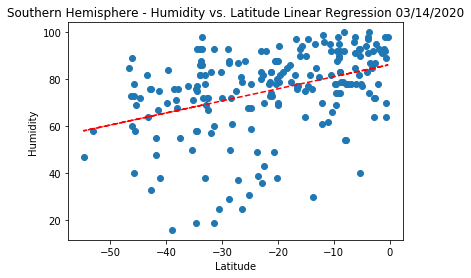

<Figure size 432x288 with 0 Axes>

In [36]:
south_latitude = south_hemisphere_df.loc[:,'Latitude']
south_humidity = south_hemisphere_df.loc[:,'Humidity (%)']

x = south_latitude
y = south_humidity


#calculating the linear regression using scipy.stats library
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
print(f"The correlation factor is {round(rvalue, 2)}")

# #format
plt.title(f"Southern Hemisphere - Humidity vs. Latitude Linear Regression {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
regress = x * slope + intercept

line_eq = print(f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.scatter(x, y)
plt.plot(x, regress, "r--")

fig4 = plt.gcf()
plt.show()
plt.draw()
fig4.savefig("Output_Data/humidity_Slat_LR.png", dpi=50)



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation factor is 0.32
y = 0.37x + 52.88


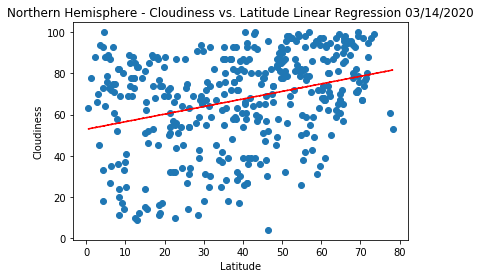

<Figure size 432x288 with 0 Axes>

In [37]:
north_latitude = north_hemisphere_df.loc[:,'Latitude']
north_cloudiness = north_hemisphere_df.loc[:,'Cloudiness']

x = north_latitude
y = north_humidity 


#calculating the linear regression using scipy.stats library
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
print(f"The correlation factor is {round(rvalue, 2)}")

# #format
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude Linear Regression {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
regress = x * slope + intercept

line_eq = print(f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.scatter(x, y)
plt.plot(x, regress, "r--")

fig5 = plt.gcf()
plt.show()
plt.draw()
fig5.savefig("Output_Data/cloudiness_Nlat_LR.png", dpi=50)


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation factor is 0.28
y = 0.8x + 76.55


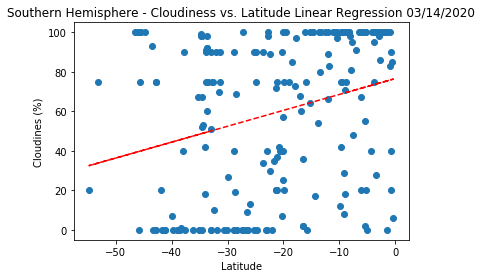

<Figure size 432x288 with 0 Axes>

In [38]:
south_latitude = south_hemisphere_df.loc[:,'Latitude']
south_cloudiness = south_hemisphere_df.loc[:,'Cloudiness']

x = south_latitude
y = south_cloudiness


#calculating the linear regression using scipy.stats library
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
print(f"The correlation factor is {round(rvalue, 2)}")

# #format
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude Linear Regression {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudines (%)")
regress = x * slope + intercept

line_eq = print(f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.scatter(x, y)
plt.plot(x, regress, "r--")

fig6 = plt.gcf()
plt.show()
plt.draw()
fig6.savefig("Output_Data/cloudiness_slat_LR.png", dpi=50)



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation factor is 0.18
y = 0.06x + 6.88


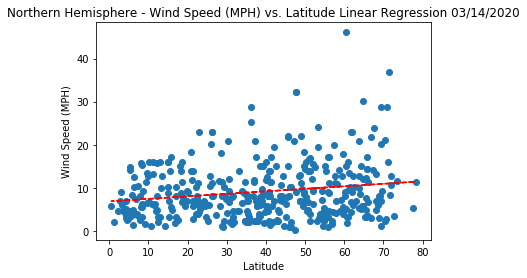

<Figure size 432x288 with 0 Axes>

In [39]:
north_latitude = north_hemisphere_df.loc[:,'Latitude']
north_windspeed = north_hemisphere_df.loc[:,'Wind Speed (MPH)']

x = north_latitude
y = north_windspeed 


#calculating the linear regression using scipy.stats library
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
print(f"The correlation factor is {round(rvalue, 2)}")

# #format
plt.title(f"Northern Hemisphere - Wind Speed (MPH) vs. Latitude Linear Regression {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
regress = x * slope + intercept

line_eq = print(f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.scatter(x, y)
plt.plot(x, regress, "r--")

fig7 = plt.gcf()
plt.show()
plt.draw()
fig7.savefig("Output_Data/windspeed_Nlat_LR.png", dpi=50)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation factor is -0.17
y = -0.08x + 6.38


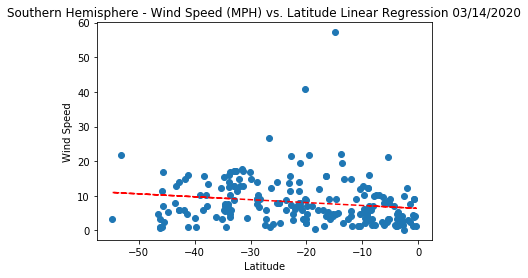

<Figure size 432x288 with 0 Axes>

In [40]:
south_latitude = south_hemisphere_df.loc[:,'Latitude']
south_windspeed = south_hemisphere_df.loc[:,'Wind Speed (MPH)']

x = south_latitude
y = south_windspeed


#calculating the linear regression using scipy.stats library
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
print(f"The correlation factor is {round(rvalue, 2)}")

# #format
plt.title(f"Southern Hemisphere - Wind Speed (MPH) vs. Latitude Linear Regression {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
regress = x * slope + intercept

line_eq = print(f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.scatter(x, y)
plt.plot(x, regress, "r--")

fig8 = plt.gcf()
plt.show()
plt.draw()
fig8.savefig("Output_Data/windspeed_slat_LR.png", dpi=50)

